#### Pandas 
- 머신러닝에서 데이터 셋을 다룰 때 판다스 라이브러리를 이용한다
- 판다스는 1차원 배열 형태의 시리즈 자료구조와 2차원 배열 형태의 데이터 프레임 자료구조를 지원한다

In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


In [2]:
data1 = ['a','b','c','d','e']
print(data1)
print("자료형:", type(data1))

['a', 'b', 'c', 'd', 'e']
자료형: <class 'list'>


In [3]:
# 앞에서 만든 리스트 객체를 판다스 시리즈로 변환한다.

sr1 = pd.Series(data1)
print("자료형:", type(sr1))

자료형: <class 'pandas.core.series.Series'>


In [4]:
print(sr1)

0    a
1    b
2    c
3    d
4    e
dtype: object


In [5]:
# 시리즈 객체의 우너소를 추출할 때는 loc 인덱서를 사용한다.
sr1.loc[0]

'a'

In [6]:
# 인덱스 범위를 지정하여 슬라이싱 추출하는 방법도 가능하다.
# 범위의 마지막 인덱스에 해당하는 원소도 포함되어 추출된다!
sr1.loc[1:3]

1    b
2    c
3    d
dtype: object

In [7]:
data2 = (1,2,3.14,100,-10)
sr2 = pd.Series(data2)
print(sr2)

0      1.00
1      2.00
2      3.14
3    100.00
4    -10.00
dtype: float64


- 자료형을 나타내는 dtype이 float64로 확인된다.

#### 1차원 구조의 시리즈를 여러 개 결합하면 데이터 프레임을 만들 수 있다.

In [8]:
dict_data = {'c0':sr1, 'c1':sr2}
df1 = pd.DataFrame(dict_data)
df1

,c0,c1
0,a,1.00
1,b,2.00
2,c,3.14
3,d,100.00
4,e,-10.00


In [9]:
# 데이터 프레임의 자료형을 확인해보기

print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [10]:
# 데이터 프레임의 열 이름은 columns 속성으로 추출한다.
df1.columns

Index(['c0', 'c1'], dtype='object')

In [11]:
# columns 속성에 새로운 열 이름의 배열을 지정하는 방식으로 열 이름을 변경할 수 있다.
df1.columns= ['string','number']
df1

,string,number
0,a,1.00
1,b,2.00
2,c,3.14
3,d,100.00
4,e,-10.00


In [12]:
# 행 인덱스는 정수 0부터 4까지 오름차순으로 자동 지정된다.
df1.index

RangeIndex(start=0, stop=5, step=1)

In [13]:
# index 속성에 새로운 행 인덱스의 배열을 지정하여 행 인덱스를 변경한다.

df1.index = ['r0','r1','r2','r3','r4']
df1

,string,number
r0,a,1.00
r1,b,2.00
r2,c,3.14
r3,d,100.00
r4,e,-10.00


In [14]:
# 데이터 프레임의 일부분을 추출할 때 loc인덱서를 사용한다 
# loc[행 인덱스, 열 이름] 형태로 입력하여 해당 위치의 원소를 추출한다.

df1.loc['r2','number']


3.14

In [15]:
# loc 인덱서에 범위를 지정하는 방법이다.
# 행 인덱스 옵션에 r2~r3 범위를 지정하고
# 열 이름 옵션에 string,number 범위를 지정한다.

df1.loc['r2':'r3', 'string':'number']

,string,number
r2,c,3.14
r3,d,100.00


In [16]:
# loc 인덱서의 행 인덱스 옵션에 'r2','r3' 범위를 지정하고, 열이름 옵션에 'number' 열을 지정한다.
# 이 경우에는 하나의 열이 추출되기 때문에 원소 2개를 갖는 시리즈 객체가 된다.
df1.loc['r2':'r3','number']

r2      3.14
r3    100.00
Name: number, dtype: float64

In [17]:
# loc 인덱서의 행 인덱스 옵션 'r2'를 지정하고, 열 이름 옵션에 'string','number' 범위를 지정한다

df1.loc['r2', 'string':'number']

string       c
number    3.14
Name: r2, dtype: object

In [18]:
# loc 인덱서의 행 인덱스 옵션에 모든 (:) 행을 지정하고, 열이름 옵션에 'string' 열을 지정한다.

df1.loc[:,'string']

r0    a
r1    b
r2    c
r3    d
r4    e
Name: string, dtype: object

In [19]:
# loc 인덱서의 행 인덱스 옵션에 'r2':'r3' 범위를 지정하고, 열 이름 옵션에 모든(:) 열을 지정한다.

df1.loc['r2':'r3', :]

,string,number
r2,c,3.14
r3,d,100.00


#### 일차함수 관계식 찾기
- 문제파악 -> 데이터 탐색 -> 데이터 전처리 -> 모델 학습 -> 예측

In [20]:
# 리스트 x,y는 각각 10개의 숫자를 원소로 갖는다 
# x 변수와 y 변수 사이에는 일차함수 관계가 성립된다. 
# y=x+1관계

x = [-3,31,-11,4,0,22,-2,-5,-25,-14]
y = [-2,32,-10,5,1,23,-1,-4,-24,-13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


#### 데이터 탐색
- x,y 변수 사이의 관계식을 그래프로 그려본다.
- matplolib 패키지를 활용한다.

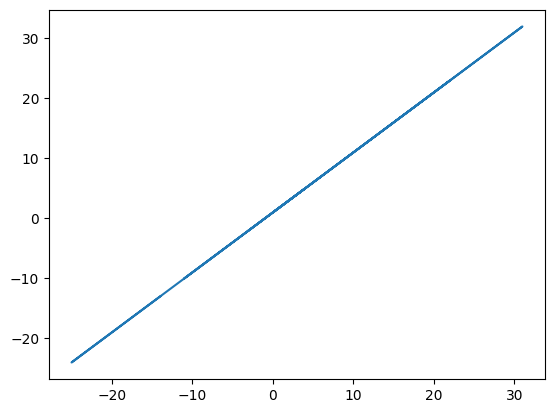

In [21]:
# plot()함수를 이용하여 입력값에 x,y변수의 데이터를 넣고 
# 가로 : x축
# 세로 : y축

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

#### 데이터 전처리
- ML에서 모델에 입력할 데이터를 정리하기 위해 판다스를 주로 사용한다.
- Dataframe 함수에 딕셔너리 형태로 입력하면 데이터프레임이 만들어진다.

In [22]:
import pandas as pd
df = pd.DataFrame({'X':x,'Y':y})
df.shape

(10, 2)

In [23]:
# head 메소드는 데이터 프레임의 첫 5개의 행 (인덱스 0~4)을 추출하여 표시한다.
df.head()

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [24]:
# tail 메소드는 데이터 프레임의 뒤에서부터 5개의 행을 보여준다.

df.tail()

,X,Y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [25]:
# 설명 변수에는 x열 데이터를 선택하여 X_train에 저장한다.
# 목표 변수에는 y열 데이터를 선택하여 Y-train에 저장한다.

train_feature = ['X']
target_cols = ['Y']

X_train = df.loc[:,train_feature]
Y_train = df.loc[:,target_cols]
print(X_train.shape, Y_train.shape)

(10, 1) (10, 1)


#### 모델 학습
- 선형회귀 관계식을 찾아본다.
- sklearn 패키지의 linear_model에서 Linear Regresssion클래스 함수를 불러온다.

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [27]:
# 학습을 끝낸 lr 모델 인스턴스 객체의 coef_속성으로부터 X변수의 회귀계수(기울기)를 얻을 수 있다.
# intercept_ 속성은 상수항(y절편)을 나타낸다.

lr.coef_,lr.intercept_

(array([[1.]]), array([1.]))

In [28]:
print("기울기:"  , lr.coef_[0][0])
print("y절편:"  , lr.intercept_[0])

기울기: 0.9999999999999999
y절편: 0.9999999999999999


In [30]:
import numpy as np

# 현재 X-train의 구조가 2차원 구조임으로 predict 메소드에 입력되기 전에 11의 값을 2차원 배열로 만들어줘야 한다.
X_new = np.array(11).reshape(1,1)
lr.predict(X_new)

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.]])

In [32]:
# np.arange(11,16,1)
# 11부터 15까지 1의 간격을 두고 1차원 배열을 만든다.
# 예측을 하기 위한 test값 이므로 2차원 배열의 형태로 만들어준다.
X_test = np.arange(11,16,1).reshape(-1,1)
X_test


array([[11],
       [12],
       [13],
       [14],
       [15]])

In [33]:
# y=x+1의 관계식을 갖는 모델이므로 11~15까지의 값에 1을 더한 12~16의 값이 나와야한다.
y_pred = lr.predict(X_test)
y_pred

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])